In [2]:
import numpy as np
#import blaze as bl
import pandas as pd
import seaborn; seaborn.set()
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [5]:
uri = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'

In [6]:
d = pd.read_csv(uri, parse_dates = ['time',], index_col='time')

In [7]:
d.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [8]:
d.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [9]:
top = d.sort('mag', ascending=False).head(20)
top

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17,2.885,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18,1.078,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46,2.250,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21,3.729,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


In [9]:
gb = d.groupby('mag')

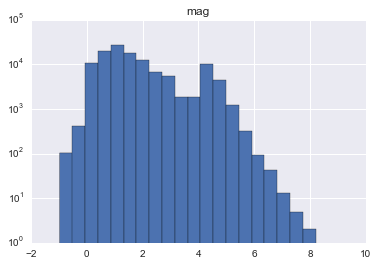

In [10]:
#gb['depth'].count().plot() # not necessary
#d['mag'].hist(by=d['mag']) # didn't work
d.hist('mag', bins=20)
ax = plt.gca()
ax.set_yscale('log')

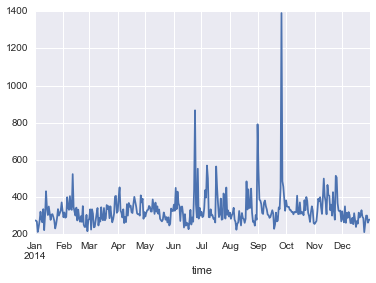

In [11]:
d.groupby(pd.TimeGrouper('1d'), axis=0)['mag'].count().plot()

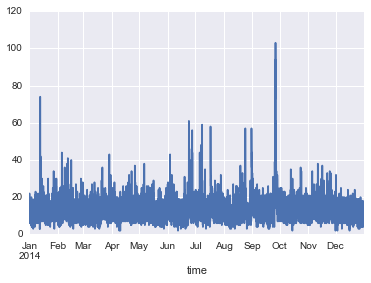

In [12]:
d.groupby(pd.TimeGrouper('1h'), axis=0)['mag'].count().plot()

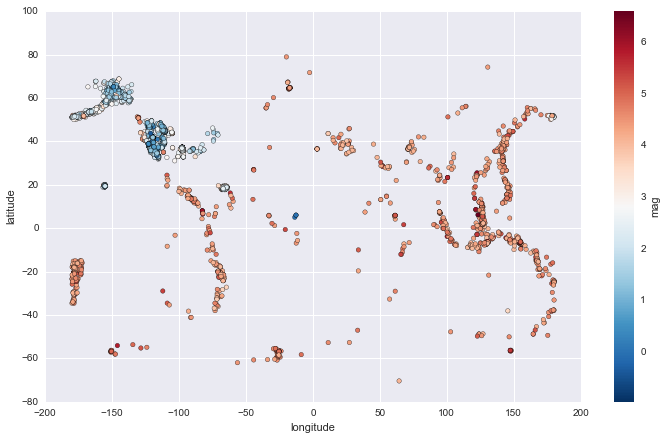

In [13]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
subplot = df.plot(kind='scatter', x='longitude', y='latitude', c='mag', ax=ax, cmap='RdBu_r')
#subplot.set_xlim([0,20])
#hbin.set_c

In [14]:
from matplotlib.colors import Colormap
from matplotlib.cm import ScalarMappable


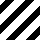
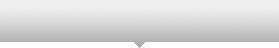
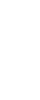
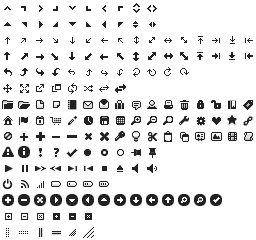
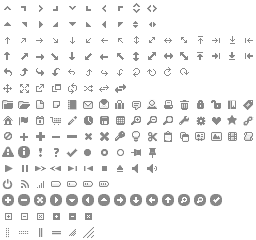
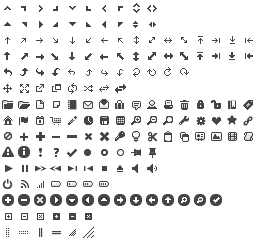
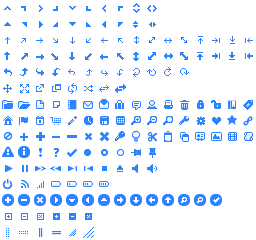
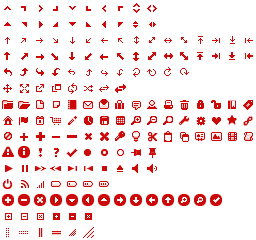
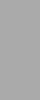
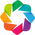
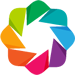
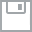
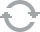
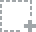
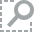
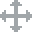
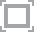
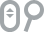

In [15]:
# bokeh version
from bokeh.plotting import figure, show, output_notebook
output_notebook()

In [16]:
p = figure(title = "Earthquakes", width=900, height=500,)
p.xaxis.axis_label = 'lon'
p.yaxis.axis_label = 'lat'

sm = ScalarMappable(cmap='Greens')
rgb = (255*sm.to_rgba(df['mag'].values)[:,:3]).astype('int')
colors = ["#%02x%02x%02x" % tuple(c) for c in rgb]


p.scatter(df['longitude'], df['latitude'],
       fill_color=colors, fill_alpha=0.6, line_color=None)


show(p)